In [1]:
import sys, os
import numpy as np
import mdtraj as md


In [2]:
color=['red','green','gold','cyan','blue','magenta','orange','indigo','pink','darkred','indianred','springgreen','purple','goldenrod','peru','y','lightskyblue','blueviolet','gold','lightgreen','deeppink','darkorchid','navy']

In [3]:
d_total=[]   # create an empty list of total COM distance
d=dict()
for j in range(20): # 20 parallel simulation trajectories
    print j
    d[j]=np.load('com/distance_%d.npy'%j)
    for k in d[j]:
        d_total.append(k)
print len(d_total)
np.save('com_total.npy',d_total)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1200020


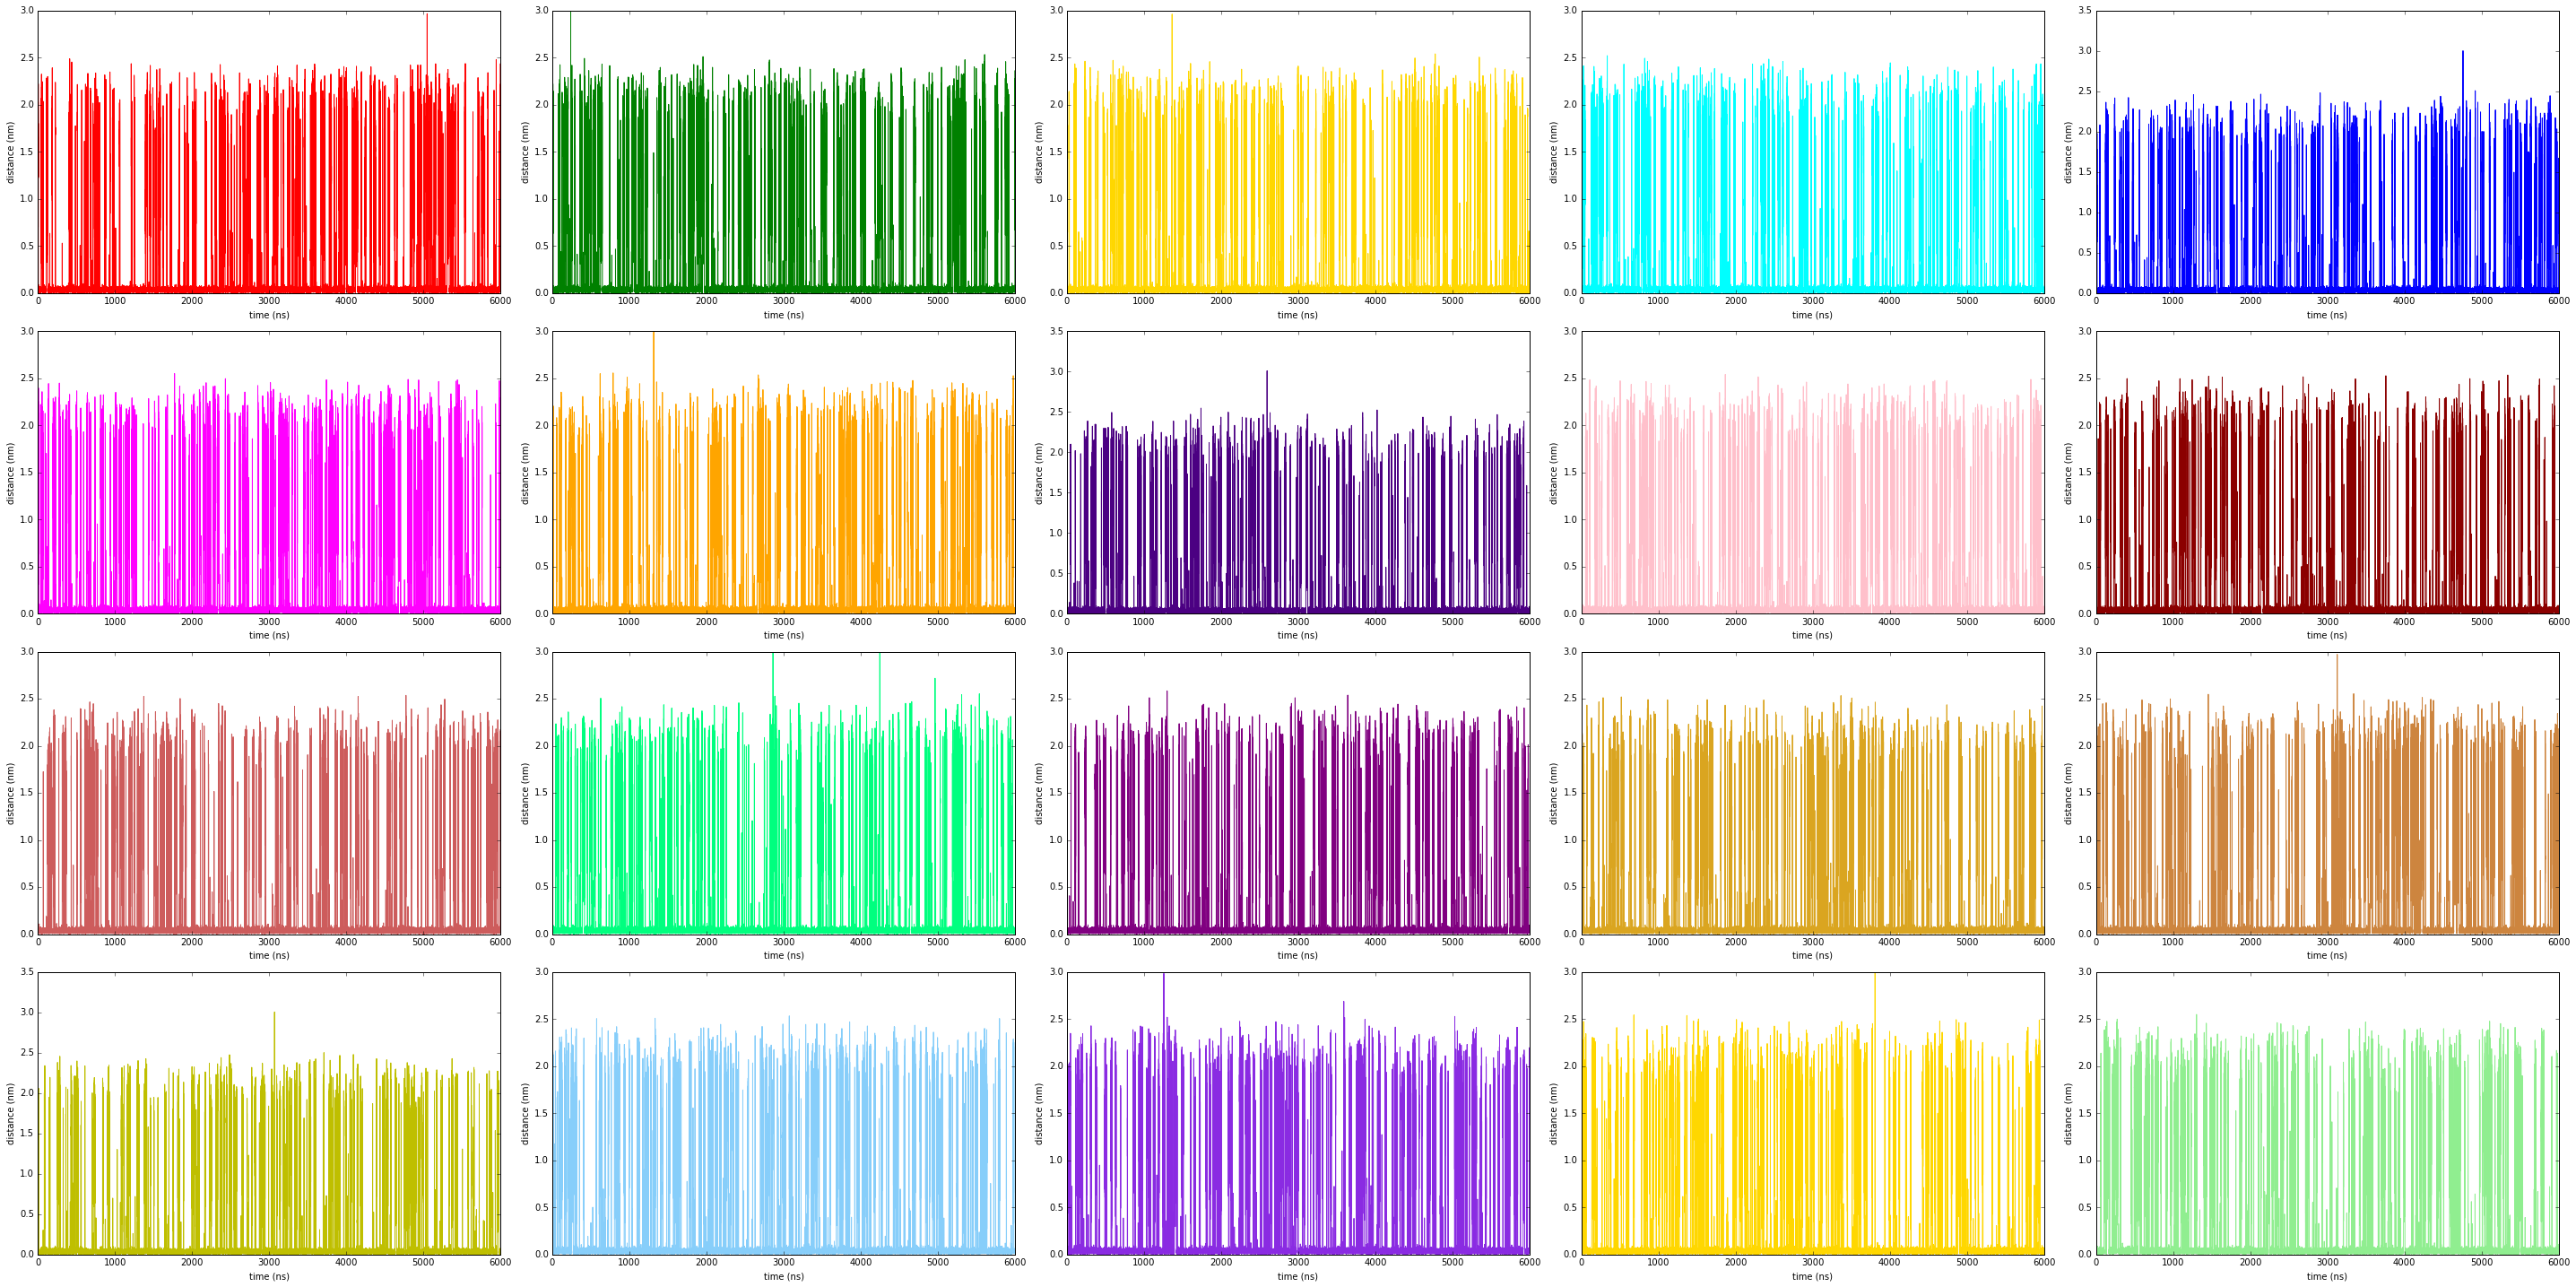

In [4]:
# let's plot traces of each trajectory
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(40,20))
for i in range(20):
    x=np.arange(0,len(d[i])/10.0,0.1) # x in the unit of ns
    plt.subplot(4,5,i+1)
    plt.plot(x,d[i],color=color[i])
    plt.xlabel('time (ns)')
    plt.ylabel('distance (nm)')
plt.tight_layout()
plt.savefig('trace.pdf')
plt.show()
plt.close()


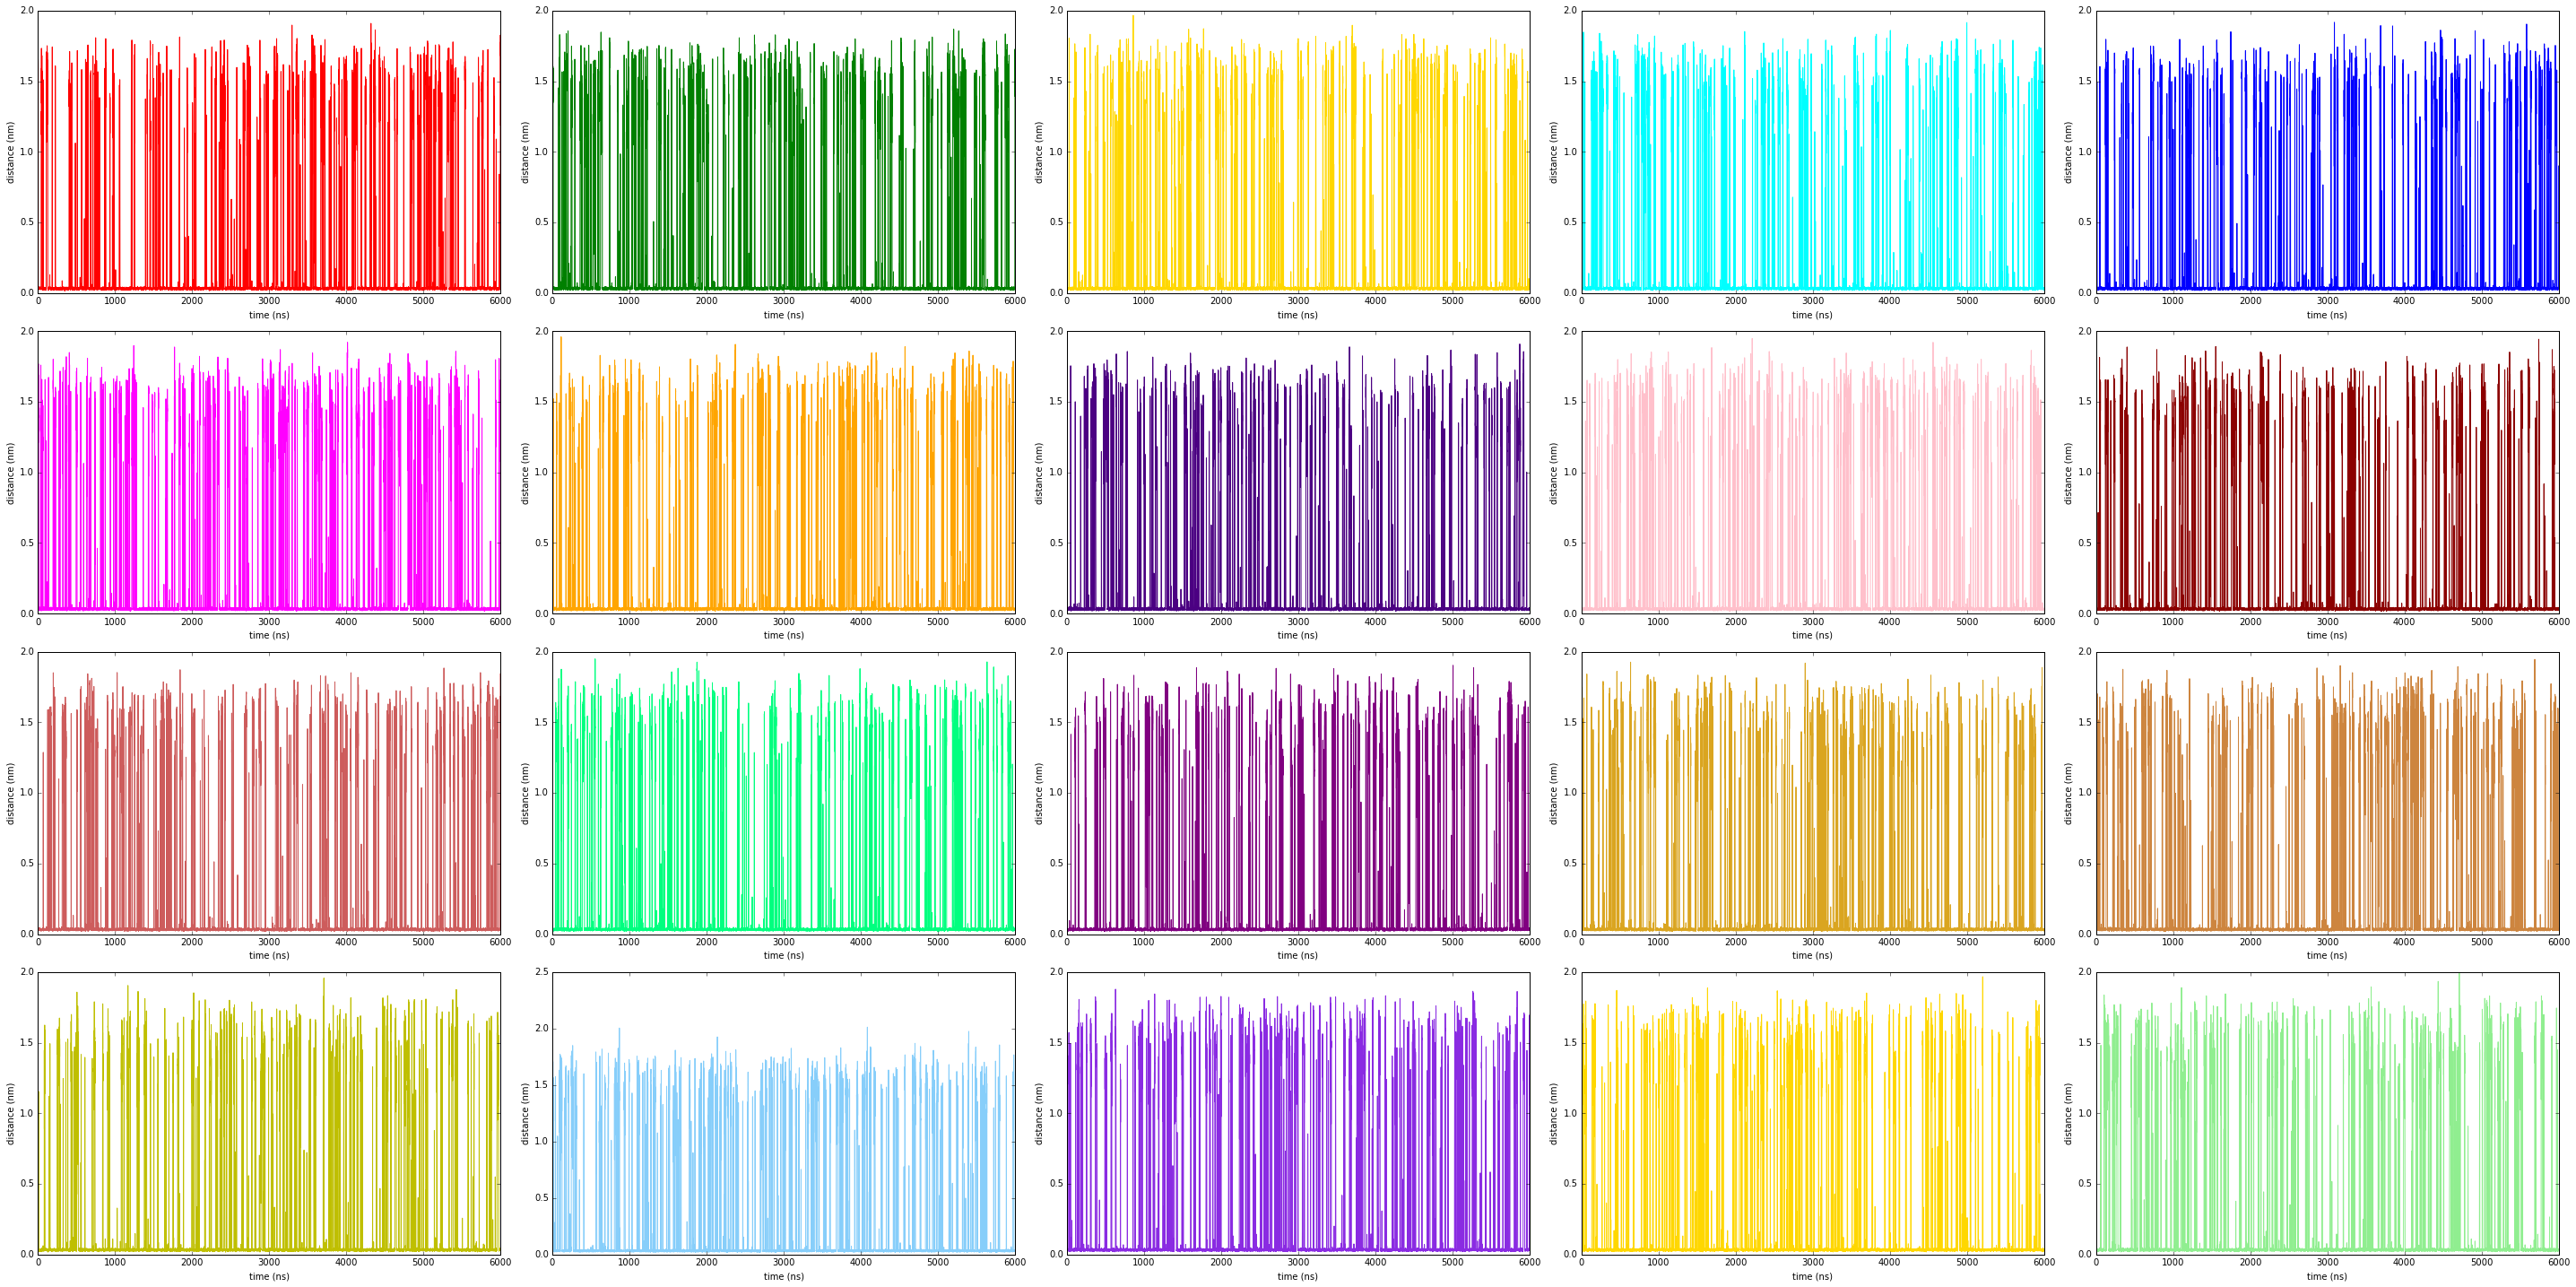

In [5]:
# let's plot smooth figures 
s=10
smoothd=dict()
for j in range(20):
    smoothd[j] = np.zeros(len(d[j])-s+1)
    for i in range(s):
            smoothd[j] += d[j][i:len(d[j])-s+1+i]
    smoothd[j] = smoothd[j]/float(s)
plt.figure(figsize=(40,20))
for i in range(20):
    x=np.arange(0,len(smoothd[i])/10.0,0.1)
    plt.subplot(4,5,i+1)
    plt.plot(x,smoothd[i],color=color[i])
    plt.xlabel('time (ns)')
    plt.ylabel('distance (nm)')
plt.tight_layout()
plt.savefig('smooth_trace.pdf')
plt.show()
plt.close()


max distance 3.0089422752
pop of bin[0] 1007901 pop of sum of other bins 192116
bincenters [ 0.05  0.15  0.25  0.35  0.45  0.55  0.65  0.75  0.85  0.95  1.05  1.15
  1.25  1.35  1.45  1.55  1.65  1.75  1.85  1.95  2.05  2.15  2.25  2.35
  2.45  2.55  2.65  2.75  2.85  2.95]


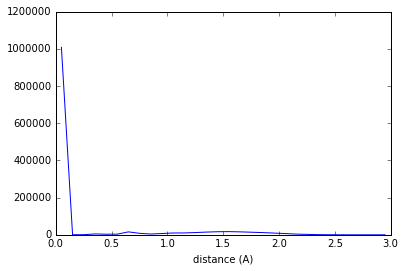

In [12]:
# let's plot histogram of all trajectories

counts,bins = np.histogram(d_total, bins=np.arange(0,max(d_total),0.1) )
print "max distance", max(d_total)
print "pop of bin[0]",counts[0]
print "pop of sum of other bins", sum(counts)-counts[0]
 
bincenters = (bins[0:-1]+bins[1:])/2.0
print "bincenters", bincenters
plt.figure()
plt.plot(bincenters, counts)
plt.xlabel('distance (A)')
plt.savefig('hist_total.pdf')
plt.show()
plt.close()
